# Load Packages

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load Data Points (Do not modify the following block)

We have 15 number of data
Coefficients of the original polynomial
w0:-0.467  w1:-0.005  w2:0.281  w3:-0.054  


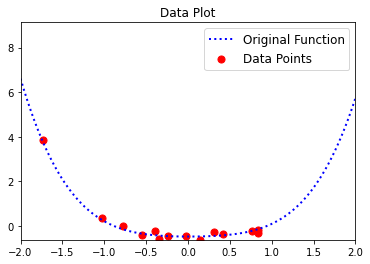

In [3]:
with open('training_data.npz', 'rb') as f:
    data = np.load(f)

    x_list = data['x_list']
    y_list = data['y_list']

    x_data = data['x_data']
    y_data = data['y_data']
    n_data = len(x_data)
    
    w = data['w']
    original_degree = data['order']
    
# Print information of original function.
print("=================================")
print("We have", n_data, "number of data")

print("=================================")
weight_info_string = ''
for d in range(original_degree):
    weight_info_string += 'w'+str(d)+':'+str(round(w[d],ndigits=3))+'  '
print("Coefficients of the original polynomial")
print(weight_info_string)
print("=================================")
    
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

# Polynomial Regression (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'w' is true coefficients of the original polynomial function
- 'original_degree' is the order of the original polynomial function
- 'x_list' is a list of the points at $x$-axis
- 'y_list' is a list of function value $f(x)$ corresponding to 'x_list'. In other words, y_list = $f($x_list$)$
- 'x_data' is an input data
- 'y_data' is an output data
- 'n_data' is the number of data points

### Our goal is to estimate 'w' from data points, 'x_data' and 'y_data'. Answer the following problems.

### 1. Compute a Vandermonde matrix when the degree of polynomial is $4$ (30pt)
- The variable 'degree' is the order of polynomial. In this problem, we set degree=$4$
- Use the variable 'A' for the Vandermonde matrix. Now, 'A' is initialized as a zero matrix whose elements are all zero. Fill in the element of the Vandermonde matrix by using power operator (\*\*), for loop, and np.concatenation.

In [78]:
degree = 4
A = np.zeros((n_data, degree+1)) # Dummy initialization

k=np.array([[x_data[0]**0,x_data[0]**1,x_data[0]**2,x_data[0]**3,x_data[0]**4]])
for i in range (1,15):
    bi= np.array([[x_data[i]**0,x_data[i]**1,x_data[i]**2,x_data[i]**3,x_data[i]**4]])
    
 
    k=np.concatenate((k,bi),axis=0)

A=A+k   

    

[[ 1.00000000e+00  7.69458258e-01  5.92066011e-01  4.55570081e-01
   3.50542161e-01]
 [ 1.00000000e+00 -5.48726825e-01  3.01101129e-01 -1.65222266e-01
   9.06618896e-02]
 [ 1.00000000e+00 -3.96088994e-01  1.56886491e-01 -6.21410124e-02
   2.46133711e-02]
 [ 1.00000000e+00 -3.44457358e-01  1.18650871e-01 -4.08701656e-02
   1.40780292e-02]
 [ 1.00000000e+00 -1.73259726e+00  3.00189326e+00 -5.20107204e+00
   9.01136317e+00]
 [ 1.00000000e+00 -1.02635747e+00  1.05340965e+00 -1.08117486e+00
   1.10967189e+00]
 [ 1.00000000e+00  8.31832735e-01  6.91945699e-01  5.75583083e-01
   4.78788850e-01]
 [ 1.00000000e+00  4.18095727e-01  1.74804037e-01  7.30848209e-02
   3.05564513e-02]
 [ 1.00000000e+00 -7.73450895e-01  5.98226287e-01 -4.62698657e-01
   3.57874691e-01]
 [ 1.00000000e+00  1.41388300e-01  1.99906515e-02  2.82644423e-03
   3.99626146e-04]
 [ 1.00000000e+00  3.16614871e-01  1.00244977e-01  3.17390503e-02
   1.00490553e-02]
 [ 1.00000000e+00  8.32089704e-01  6.92373276e-01  5.76116675e-01

### Print results (do not modify the following block)

In [76]:
print(A)

[[ 1.00000000e+00  7.69458258e-01  5.92066011e-01  4.55570081e-01
   3.50542161e-01]
 [ 1.00000000e+00 -5.48726825e-01  3.01101129e-01 -1.65222266e-01
   9.06618896e-02]
 [ 1.00000000e+00 -3.96088994e-01  1.56886491e-01 -6.21410124e-02
   2.46133711e-02]
 [ 1.00000000e+00 -3.44457358e-01  1.18650871e-01 -4.08701656e-02
   1.40780292e-02]
 [ 1.00000000e+00 -1.73259726e+00  3.00189326e+00 -5.20107204e+00
   9.01136317e+00]
 [ 1.00000000e+00 -1.02635747e+00  1.05340965e+00 -1.08117486e+00
   1.10967189e+00]
 [ 1.00000000e+00  8.31832735e-01  6.91945699e-01  5.75583083e-01
   4.78788850e-01]
 [ 1.00000000e+00  4.18095727e-01  1.74804037e-01  7.30848209e-02
   3.05564513e-02]
 [ 1.00000000e+00 -7.73450895e-01  5.98226287e-01 -4.62698657e-01
   3.57874691e-01]
 [ 1.00000000e+00  1.41388300e-01  1.99906515e-02  2.82644423e-03
   3.99626146e-04]
 [ 1.00000000e+00  3.16614871e-01  1.00244977e-01  3.17390503e-02
   1.00490553e-02]
 [ 1.00000000e+00  8.32089704e-01  6.92373276e-01  5.76116675e-01

### 2. Compute the coefficients of polynomial regression using a $4$ degree polynomial  (40pt)
- Use the variable 'degree' and the Vandermonde matrix 'A' in Problem 1.
- The variable 'w_est' is the coefficients of polynomial regression. Now, 'w_est' is initialized as a zero vector. Compute the 'w_est' from 'A' and 'y'
- The variable 'y_est' is an estimated function value corresponding to the input points 'x_list'. Now, it is a zero list and fill the list by computing the estimated function values. In other words, y_est = $\hat{f}($x_list$)$

In [95]:
w_est = np.zeros((5,1))
Y = np.array([[y_data[0]],[y_data[1]],[y_data[2]],[y_data[3]],[y_data[4]],[y_data[5]],[y_data[6]],[y_data[7]],[y_data[8]],[y_data[9]],[y_data[10]],[y_data[11]],[y_data[12]],[y_data[13]],[y_data[14]]])
w = np.dot(np.dot(np.linalg.inv(np.dot (A.T, A)),A.T),Y)
w_est=w_est+w

y_est = np.zeros_like(x_list)

aa = np.zeros((100, degree+1)) 
kk=np.array([[x_list[0]**0,x_list[0]**1,x_list[0]**2,x_list[0]**3,x_list[0]**4]])
for j in range (1,100):
    bj= np.array([[x_list[j]**0,x_list[j]**1,x_list[j]**2,x_list[j]**3,x_list[j]**4]])
    
    
    kk=np.concatenate((kk,bj),axis=0)
    
aa=aa+kk
yy=np.dot(aa,w_est)
y_est=yy




### Print results (do not modify the following block)

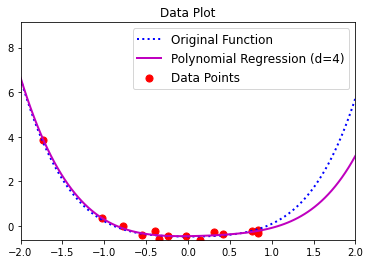

In [96]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(degree))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 3. Compute the polynomial regression with $1$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $1$.
- Use the following variables.
> degree1, A1, w_est1, y_est1

In [94]:
degree1 = 1
A1 = np.zeros((n_data, degree1+1)) 
k1=np.array([[x_data[0]**0,x_data[0]**1]])
for i in range (1,15):
    ai= np.array([[x_data[i]**0,x_data[i]**1]])
    
 
    k1=np.concatenate((k1,ai),axis=0)

A1=A1+k1   
print(A1)

w_est1 = np.zeros((degree1+1,1))
Y1 = np.array([[y_data[0]],[y_data[1]],[y_data[2]],[y_data[3]],[y_data[4]],[y_data[5]],[y_data[6]],[y_data[7]],[y_data[8]],[y_data[9]],[y_data[10]],[y_data[11]],[y_data[12]],[y_data[13]],[y_data[14]]])
w1 = np.dot(np.dot(np.linalg.inv(np.dot (A1.T, A1)),A1.T),Y1)
w_est1=w_est1+w1
print(w_est1)

y_est1 = np.zeros_like(x_list)
aa1 = np.zeros((100, degree1+1)) 
kk1=np.array([[x_list[0]**0,x_list[0]**1]])
for i in range (1,100):
    ci= np.array([[x_list[i]**0,x_list[i]**1]])
    
    
    kk1=np.concatenate((kk1,ci),axis=0)
    
aa1=aa1+kk1
yy1=np.dot(aa1,w_est1)
y_est1=yy1

print(y_est1)

[[ 1.          0.76945826]
 [ 1.         -0.54872683]
 [ 1.         -0.39608899]
 [ 1.         -0.34445736]
 [ 1.         -1.73259726]
 [ 1.         -1.02635747]
 [ 1.          0.83183273]
 [ 1.          0.41809573]
 [ 1.         -0.7734509 ]
 [ 1.          0.1413883 ]
 [ 1.          0.31661487]
 [ 1.          0.8320897 ]
 [ 1.         -0.02034966]
 [ 1.         -0.24342833]
 [ 1.         -2.17955166]]
[[ 0.04199764]
 [-2.19963918]]
[[ 4.44127600e+00]
 [ 4.35240169e+00]
 [ 4.26352738e+00]
 [ 4.17465307e+00]
 [ 4.08577876e+00]
 [ 3.99690445e+00]
 [ 3.90803014e+00]
 [ 3.81915583e+00]
 [ 3.73028152e+00]
 [ 3.64140721e+00]
 [ 3.55253290e+00]
 [ 3.46365859e+00]
 [ 3.37478427e+00]
 [ 3.28590996e+00]
 [ 3.19703565e+00]
 [ 3.10816134e+00]
 [ 3.01928703e+00]
 [ 2.93041272e+00]
 [ 2.84153841e+00]
 [ 2.75266410e+00]
 [ 2.66378979e+00]
 [ 2.57491548e+00]
 [ 2.48604117e+00]
 [ 2.39716686e+00]
 [ 2.30829255e+00]
 [ 2.21941824e+00]
 [ 2.13054393e+00]
 [ 2.04166962e+00]
 [ 1.95279531e+00]
 [ 1.8639210

### Print results (do not modify the following block)

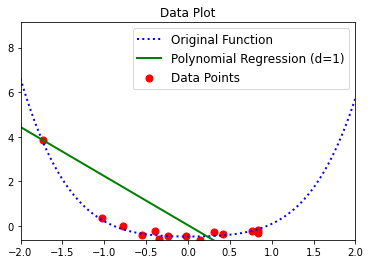

In [93]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(degree1))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 4. Compute the polynomial regression with $10$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $10$.
- Use the following variables.
> degree2, A2, w_est2, y_est2

In [104]:
degree2 = 10
A2 = np.zeros((n_data, degree2+1))
k2=np.array([[x_data[0]**0,x_data[0]**1,x_data[0]**2,x_data[0]**3,x_data[0]**4,x_data[0]**5,x_data[0]**6,x_data[0]**7,x_data[0]**8,x_data[0]**9,x_data[0]**10]])
for i in range (1,15):
    di= np.array([[x_data[i]**0,x_data[i]**1,x_data[i]**2,x_data[i]**3,x_data[i]**4,x_data[i]**5,x_data[i]**6,x_data[i]**7,x_data[i]**8,x_data[i]**9,x_data[i]**10]])
    
 
    k2=np.concatenate((k2,di),axis=0)

A2=A2+k2


w_est2 = np.zeros((degree2+1,1))
Y2 = np.array([[y_data[0]],[y_data[1]],[y_data[2]],[y_data[3]],[y_data[4]],[y_data[5]],[y_data[6]],[y_data[7]],[y_data[8]],[y_data[9]],[y_data[10]],[y_data[11]],[y_data[12]],[y_data[13]],[y_data[14]]])
w2 = np.dot(np.dot(np.linalg.inv(np.dot (A2.T, A2)),A2.T),Y2)
w_est2=w_est2+w2



y_est2 = np.zeros_like(x_list)
aa2 = np.zeros((100, degree2+1)) 
kk2=np.array([[x_list[0]**0,x_list[0]**1,x_list[0]**2,x_list[0]**3,x_list[0]**4,x_list[0]**5,x_list[0]**6,x_list[0]**7,x_list[0]**8,x_list[0]**9,x_list[0]**10]])
for i in range (1,100):
    ei= np.array([[x_list[i]**0,x_list[i]**1,x_list[i]**2,x_list[i]**3,x_list[i]**4,x_list[i]**5,x_list[i]**6,x_list[i]**7,x_list[i]**8,x_list[i]**9,x_list[i]**10]])
    
    
    kk2=np.concatenate((kk2,ei),axis=0)
    
aa2=aa2+kk2
yy2=np.dot(aa2,w_est2)
y_est2=yy2

print(y_est2)






[[ 4.73697181e+01]
 [ 4.13035912e+01]
 [ 3.39286564e+01]
 [ 2.62380844e+01]
 [ 1.89008918e+01]
 [ 1.23350107e+01]
 [ 6.76806618e+00]
 [ 2.28741051e+00]
 [-1.11918330e+00]
 [-3.53089077e+00]
 [-5.06811743e+00]
 [-5.87265613e+00]
 [-6.09279215e+00]
 [-5.87252936e+00]
 [-5.34420468e+00]
 [-4.62384559e+00]
 [-3.80870614e+00]
 [-2.97649183e+00]
 [-2.18585218e+00]
 [-1.47778257e+00]
 [-8.77634419e-01]
 [-3.97484401e-01]
 [-3.86603790e-02]
 [ 2.05736404e-01]
 [ 3.48436080e-01]
 [ 4.05822186e-01]
 [ 3.96032654e-01]
 [ 3.37376717e-01]
 [ 2.47083739e-01]
 [ 1.40382476e-01]
 [ 2.98950761e-02]
 [-7.46810502e-02]
 [-1.66638734e-01]
 [-2.42114945e-01]
 [-2.99777566e-01]
 [-3.40390829e-01]
 [-3.66304675e-01]
 [-3.80911053e-01]
 [-3.88106560e-01]
 [-3.91795963e-01]
 [-3.95465383e-01]
 [-4.01847351e-01]
 [-4.12692928e-01]
 [-4.28658761e-01]
 [-4.49309607e-01]
 [-4.73229654e-01]
 [-4.98229267e-01]
 [-5.21627615e-01]
 [-5.40586480e-01]
 [-5.52466361e-01]
 [-5.55173248e-01]
 [-5.47463207e-01]
 [-5.2917250

### Print results (do not modify the following block)

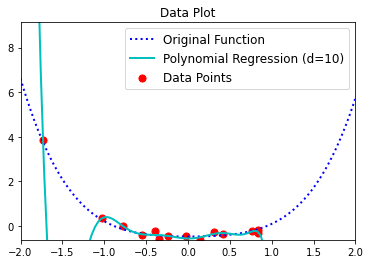

In [103]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(degree2))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 5. [Challenging Problem] Explain the effect of degree (20pt)
- By solving the above problems, we can observe the behaviors of polynomial regression with different degrees (1, 4, 10)
- Explain pros and cons of high degree polynomial
- Explain pros and cons of low degree polynomial
- What is this phenomenon called in machine learning?

### The following figure shows all regression results with different degrees.

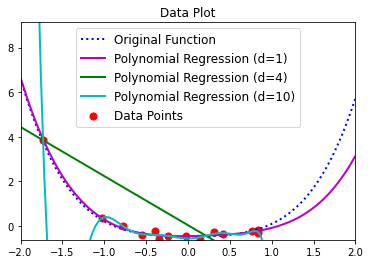

In [105]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(1))
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(4))
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(10))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

Write your answer!!!

high degree polynomial의 경우 구체적인 결과를 도출해낼 수 있지만 데이터에 과적합하다. 즉 편향이 작고 분산이 크다
low degree polynomial의 경우 복잡하지 않은 결과를 도출해낼 수 있지만 데이터에 과소 적합하다. 다시 말해 편향이 크고 분산이 작다
이러한 현상을 Bias-Variance Trade off 라고 한다
